<a href="https://colab.research.google.com/github/manashpratim/Personality-Type-Classification/blob/master/Personaltity_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Downloading the Dataset
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/2637/4381/mbti_1.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561827680&Signature=FuZVxTRJq8XHy3Zs2m7Khiac2S2SuYLxNd8fTgqmpFqGqlwwQrQEnBk4bamd6CA1cTSToRFwn8bAqPEatCbaSBmqdSX7K3FcTUid9LEkwQZNq7Yxj0NcV3trg%2FXPMXbtvwhK34wq2UgDmH0hXyOo8kcha6t%2Fc1p87jajs%2BYqJT4NLdbBxlY4n%2FOsZTkfP3%2FNBuBXDdTIjR%2BKeKRLTz4LDB%2BItuMImn%2BNHavJv%2Fw0u1mYg5yrS%2FV2JM%2F%2FHVDbApthmEo5awR5U1H2VwEe6NZNKEaHLz21wVNt3WC0OTHdF7ggAv6X4DQzymh2xhkvsuh0c5HTdJKfwGKwYDTZb14X7w%3D%3D"\
      -O "/tmp/mbti.zip"

--2019-06-27 01:09:22--  https://storage.googleapis.com/kaggle-datasets/2637/4381/mbti_1.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561827680&Signature=FuZVxTRJq8XHy3Zs2m7Khiac2S2SuYLxNd8fTgqmpFqGqlwwQrQEnBk4bamd6CA1cTSToRFwn8bAqPEatCbaSBmqdSX7K3FcTUid9LEkwQZNq7Yxj0NcV3trg%2FXPMXbtvwhK34wq2UgDmH0hXyOo8kcha6t%2Fc1p87jajs%2BYqJT4NLdbBxlY4n%2FOsZTkfP3%2FNBuBXDdTIjR%2BKeKRLTz4LDB%2BItuMImn%2BNHavJv%2Fw0u1mYg5yrS%2FV2JM%2F%2FHVDbApthmEo5awR5U1H2VwEe6NZNKEaHLz21wVNt3WC0OTHdF7ggAv6X4DQzymh2xhkvsuh0c5HTdJKfwGKwYDTZb14X7w%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26387746 (25M) [application/octet-stream]
Saving to: ‘/tmp/mbti.zip’

/tmp/mbti.zip       100%[===================>]  25.17M  74.9MB/s    in 0.3s    

2019-06-27 01:09:22 (74.9 MB/s) - ‘/t

In [0]:
# Unzipping the downloaded dataset
import os
import zipfile

local_zip='/tmp/mbti.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/mbti')
zip_ref.close()

In [14]:
#Functions for Preprocessing the Dataset
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


def mystopwords(text):
    return ' '.join([w for w in word_tokenize(text) if not w in stop_words])

import re
def clean_text(string):
  clean=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ',string) #remove url
  clean=re.sub('[\n]',' ',clean) #remove newline character
  clean=re.sub('[^a-zA-Z]',' ',clean) #remove non alphabetic characters
  clean=mystopwords(clean) #remove stopwords
  return clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
#Loading the Dataset
import pandas as pd
df=pd.read_csv('/tmp/mbti/mbti_1.csv')

In [16]:
df.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [0]:
#Cleaning the data 
data=[]
for i in range(len(df)):
  l=[]
  l.append(df['type'][i])
  l.append(clean_text(df['posts'][i]))
  data.append(l)

In [0]:
#Suffling the data and splitting the data into train and test sets (90:10)
import random
suffled_set=random.sample(data,len(data))
train_len=int(len(suffled_set)*0.9)
train=suffled_set[:train_len]
test=suffled_set[train_len:]

In [19]:
#Data Summary
print('Length of the Data: ',len(df))
print('No. of Training Examples: ',len(train))
print('No. of Test Examples: ',len(test))
print('No. of Classes: ',df['type'].nunique())

Length of the Data:  8675
No. of Training Examples:  7807
No. of Test Examples:  868
No. of Classes:  16


In [0]:
#Separating the personality types (labels) and the posts
train_sentences=[]
test_sentences=[]
train_labels=[]
test_labels=[]
labels=[]
sentences=[]

for i in range(len(train)):
  train_labels.append(train[i][0])
  train_sentences.append(train[i][1])

for i in range(len(test)):
  test_labels.append(test[i][0])
  test_sentences.append(test[i][1])

for i in range(len(suffled_set)):
  labels.append(suffled_set[i][0])
  sentences.append(suffled_set[i][1])

In [79]:
#Tokenization and Padding
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

embedding_dim = 300
max_length = 900
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
vocab_len=14999


tokenizer = Tokenizer(num_words=vocab_len+1,oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)
print('Original Size of Vocabulary: ',vocab_size)

word_index = {e:i for e,i in word_index.items() if i <= vocab_len+1} #Reducing the Size of Vocabulary
print('New Size of Vocabulary: ',len(word_index))

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#Label Encoding the labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels=le.transform(train_labels) 
le.fit(test_labels)
test_labels=le.transform(test_labels) 

train_labels=np.expand_dims(train_labels, axis=1)
test_labels=np.expand_dims(test_labels, axis=1)



Original Size of Vocabulary:  96937
New Size of Vocabulary:  15000


In [22]:
#Dimension of Data after Tokenizing and Padding
print('Dimension of Training Data: ',train_padded.shape)
print('Dimension of Test Data: ',test_padded.shape)
print('Dimension of Training Labels: ',train_labels.shape)
print('Dimension of Test Labels: ',test_labels.shape)

Dimension of Training Data:  (7807, 900)
Dimension of Test Data:  (868, 900)
Dimension of Training Labels:  (7807, 1)
Dimension of Test Labels:  (868, 1)


In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Unzipping the fasttext pretrained model from Google Drive
import os
import zipfile

local_zip='/content/drive/My Drive/crawl-300d-2M.vec.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/My Drive/crawl-300d-2M.vec')
zip_ref.close()

In [0]:
# Loading the pretrained vectors
embeddings_index = {}
import numpy as np
with open('/content/drive/My Drive/crawl-300d-2M.vec/crawl-300d-2M.vec') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [0]:
# Creating an embedding matrix that contains the vectors of the words in the MBTI dataset
embeddings_matrix = np.zeros((vocab_len+2, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector
        

In [95]:
#embeddings_matrix=np.delete(embeddings_matrix, 1, 0)
embeddings_matrix.shape

(15000, 300)

In [39]:
print('Shape of embeddings matrix: ',embeddings_matrix.shape)

Shape of embeddings matrix:  (15000, 300)


In [0]:
#from keras.regularizers import l2
#Building the CNN Model
model_conv = tf.keras.Sequential([
    #tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length, weights = [embeddings_matrix], trainable = False),
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(64,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='softmax')
])

In [127]:
model_conv.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 900, 300)          4500000   
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 898, 64)           57664     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 449, 64)           0         
_________________________________________________________________
dropout (Dropout)            (None, 449, 64)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 28736)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               3678336   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)             

In [128]:
model_conv.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history=model_conv.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))

Train on 7807 samples, validate on 868 samples
Epoch 1/20
7807/7807 [==============================] - 4s 485us/sample - loss: 2.1745 - acc: 0.2765 - val_loss: 1.8762 - val_acc: 0.4401
Epoch 2/20
7807/7807 [==============================] - 3s 357us/sample - loss: 1.5252 - acc: 0.5326 - val_loss: 1.7572 - val_acc: 0.4988
Epoch 3/20
7807/7807 [==============================] - 3s 359us/sample - loss: 0.7662 - acc: 0.7644 - val_loss: 1.8784 - val_acc: 0.4988
Epoch 4/20
7807/7807 [==============================] - 3s 360us/sample - loss: 0.2806 - acc: 0.9189 - val_loss: 2.4100 - val_acc: 0.4977
Epoch 5/20
7807/7807 [==============================] - 3s 359us/sample - loss: 0.1234 - acc: 0.9666 - val_loss: 2.8163 - val_acc: 0.5173
Epoch 6/20
7807/7807 [==============================] - 3s 358us/sample - loss: 0.0760 - acc: 0.9794 - val_loss: 2.9627 - val_acc: 0.5023
Epoch 7/20
7807/7807 [==============================] - 3s 360us/sample - loss: 0.0629 - acc: 0.9816 - val_loss: 3.2961 - val

<Figure size 432x288 with 0 Axes>

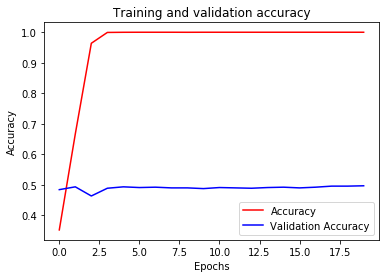

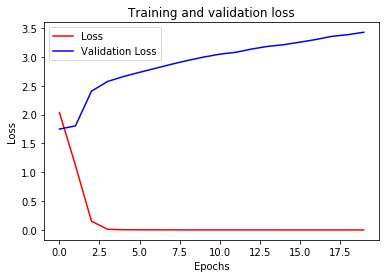

<Figure size 432x288 with 0 Axes>

In [102]:
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

# **We can see that while the training  accuracy is close to 100%, validation accuracy is just around 50%. Lets find out why!**

In [0]:
pred_prob_test_labels=model_conv.predict(test_padded)

pred_test_labels=[]
for i in range(len(pred_prob_test_labels)):
  pred_test_labels.append(np.argmax(pred_prob_test_labels[i]))  

In [0]:
pred_test_labels=np.array(pred_test_labels)
true_test_labels=np.squeeze(test_labels, axis=1)

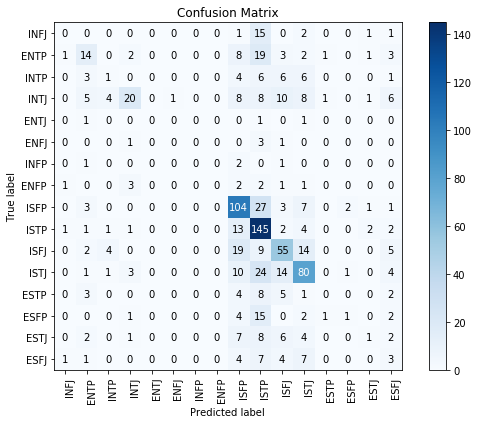

In [169]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    """if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)"""

    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(true_test_labels, pred_test_labels, classes=df['type'].unique(),
                      title='Confusion Matrix')


Text(0.5, 1.0, 'Personality Types Distribution')

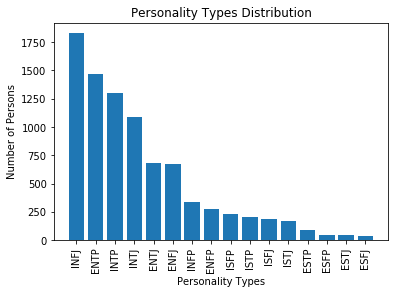

In [105]:
%matplotlib inline

y=df['type'].value_counts()
x=df['type'].unique()
plt.bar(x, y, width=0.8, bottom=None, align='center', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Personality Types')
plt.ylabel('Number of Persons')
plt.title('Personality Types Distribution')

# **It is apparent from the graph above that there is severe class imbalance problem with the dataset.**